# Análise de sentimentos do Twitter e bolsa de valores: uma investigação sobre a correlação entre estes dois sistemas

## Arquivo 2: Análise de dados


#### Instalação das dependências

In [ ]:
#Pandas
!pip install pandas
#Numpy
!pip install numpy
#Matploblib
!pip install matplotlib
#Seaborn
!pip install seaborn
#Plotly
!pip install plotly
#Cufflinks
!pip install cufflinks

#### Carregando bibliotecas

In [1]:
#IMPORTANDO BIBLIOTECAS

#Leitura do data set
import pandas as pd
#manipulacao de arrays
import numpy as np
#Biblioteca grafica
import matplotlib.pyplot as plt
#Biblioteca grafica mais bonita
import seaborn as sns
#Graficos interativos
import cufflinks as cf
from plotly.offline import init_notebook_mode, plot, iplot, download_plotlyjs
#Maniputacao de datas
from datetime import datetime

%matplotlib inline

#Permitir visualizar iplot no Jupyter Notebook ou Google colab
init_notebook_mode(connected=True)
# Para usar cf offline
cf.go_offline()

# Análise Magalu

## 1. Leitura dos dados

### 1.1 Leitura Magalu Finanças

In [2]:
df_finance = pd.read_csv('./database/finance/Magazine Luisa SA.csv', index_col=0)
df_finance.head()

#Selecionando apenas as linhas de Janeiro a Maio
df_finance = pd.DataFrame(df_finance.loc['2019-01-02':'2019-05-31',:])
df_finance.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,5.638125,5.812187,5.594687,5.812187,5.645670,27017600
2019-01-03,5.780937,5.796562,5.605000,5.750000,5.585264,26342400
2019-01-04,5.751562,5.760937,5.573437,5.575000,5.415277,27721600
2019-01-07,5.562500,5.702500,5.539687,5.661562,5.499360,21174400
2019-01-08,5.673437,5.702812,5.593750,5.615937,5.455042,19398400


### 1.2 Leitura Magalu Twitter

In [3]:
df_twitter = pd.read_csv('./database/twitter/Magalu.csv', index_col=0)
df_twitter.head()

,date,arroba,text,tweet_id,favorite,retweet
0,2019-05-28 20:13:48,corretorawlc,"28/05/19 - 17:13: Maiores Altas: BTOW3 6,34% R...",1133466423878201344,1,0
1,2019-05-29 02:21:28,ValorSem,Essa briga pela Netshoes tá emocionante. Vou a...,1133558947879837697,3,3
2,2019-05-30 18:18:31,LFBossa,@cr0moloco caralho vai tomar no cuuuu se eu so...,1134162187981926401,2,0
3,2019-05-28 22:32:02,sunoresearch,📈 Maiores altas do Ibovespa: \n\...,1133501208159825921,18,0
4,2019-05-28 15:00:06,luizcesta,Como sempre pensando na próxima derivada da no...,1133387475110551552,1,0


In [4]:
df_twitter['favorite'].count()

892

### 1.4 Gerando novas colunas do dataframe twitter

In [112]:
#Gerando a coluna do mes
df_twitter['date'] = pd.to_datetime(df_twitter['date'])

df_twitter['month'] = df_twitter['date'].apply(lambda x: x.month)
months_dict = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai'}
df_twitter['month'] = df_twitter['month'].map(months_dict)

#Gerando a coluna do dia da semana
df_twitter['day of week'] = df_twitter['date'].apply(lambda x: x.weekday())

days_of_week = {0: 'Dom', 1: 'Seg', 2: 'Ter', 3: 'Qua', 4: 'Qui', 5: 'Sex', 6: 'Sab'}
df_twitter['day of week'] = df_twitter['day of week'].map(days_of_week)

#gerando a coluna da hora em que o tweet foi feito
df_twitter['hour'] = df_twitter['date'].apply(lambda x: x.hour)

#df_twitter.head()

## 2. Análise de dados

#### Pretende-se, nesta etapa, responder as seguintes perguntas:

    * Como é o comportamento dos dados financeiros?
    * Quais usuários tem mais tweets?
    * Quais tweets tem mais curtidas?
    * Quais tweets tem mais retweets?
    * Quais usuários tem mais curtidas e retweets?
    * Quantos tweets temos por dia da semana e mês?
    * Que horários foram os que mais se fez tweets?
    * Qual é o volume de tweets totais?

### 2.1 Finanças

Todos os dados

In [6]:
df_finance.iplot()

Média vs Close

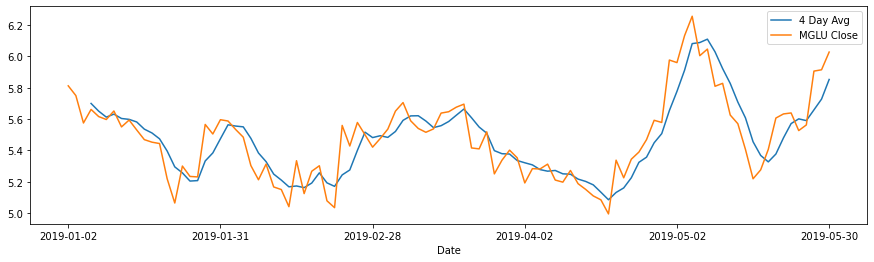

In [7]:
plt.figure(figsize=(15,4))
df_finance['Close'].rolling(window=4).mean().plot(label='4 Day Avg')
df_finance['Close'].plot(label='MGLU Close')
plt.legend()

Candle visualization

In [8]:
df_finance[['Open', 'High', 'Low', 'Close']].iplot(kind='candle')

### 2.2 Twitter

Quantidade total de tweets

In [9]:
df_twitter.index.size

892

* Quantidade de usuários únicos

In [10]:
df_twitter['arroba'].nunique()

335

* Usuários com mais tweets

In [11]:
df_twitter['arroba'].value_counts().head()

daltonvieira      62
i58imoveis        59
leiamoneytimes    22
Serrasamuel       21
bovespab          21
Name: arroba, dtype: int64

* Tweets mais curtidos

In [12]:
df_twitter.sort_values(by='favorite',ascending=False).head()

,date,arroba,text,tweet_id,favorite,retweet,month,day of week,hour
863,2019-01-05 16:17:45,FariaLimaElevat,"Meninas compram MGLU3 e meninos compram ITUB4,...",1081585555551518721,1078,106,Jan,Sex,16
95,2019-05-27 13:41:01,zelune,"@magazineluiza olha, espero que não esteja bra...",1133005188783136769,219,2,Mai,Dom,13
604,2019-02-22 06:35:35,daltozo,E a máquina de produção de análise está a toda...,1098833665319153665,152,12,Fev,Qui,6
366,2019-03-21 10:51:08,jcamargonyc,*** COMO ENCONTRAR A PROXIMA AÇÃO EXPLOSIVA DA...,1108682449649876992,116,15,Mar,Qua,10
188,2019-05-07 14:08:17,BruceBarbosa88,Quanto tempo será que #MagazineLuiza #MGLU3 co...,1125764289879584768,79,4,Mai,Seg,14


tweets com mais compartilhamentos

In [13]:
df_twitter.sort_values(by='retweet',ascending=False).head()

,date,arroba,text,tweet_id,favorite,retweet,month,day of week,hour
863,2019-01-05 16:17:45,FariaLimaElevat,"Meninas compram MGLU3 e meninos compram ITUB4,...",1081585555551518721,1078,106,Jan,Sex,16
366,2019-03-21 10:51:08,jcamargonyc,*** COMO ENCONTRAR A PROXIMA AÇÃO EXPLOSIVA DA...,1108682449649876992,116,15,Mar,Qua,10
267,2019-04-29 22:50:03,BrazilJournal,BREAKING: Magalu compra Netshoes; perdas da NE...,1122996496331415554,45,15,Abr,Dom,22
604,2019-02-22 06:35:35,daltozo,E a máquina de produção de análise está a toda...,1098833665319153665,152,12,Fev,Qui,6
291,2019-04-29 21:27:29,leiamoneytimes,#MGLU3 Magazine Luiza compra Netshoes por US$ ...,1122975718030360576,34,11,Abr,Dom,21


* Quantidade de Tweets por mês

In [14]:
df_twitter['month'].value_counts()

Fev    228
Mai    222
Jan    183
Abr    151
Mar    108
Name: month, dtype: int64

* Tweets totais por mês

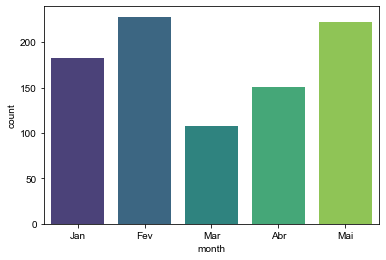

In [15]:
months_order = 'Jan Fev Mar Abr Mai'.split()
sns.countplot(x='month', data=df_twitter, order=months_order,palette='viridis')
sns.set_style('whitegrid')

* Quantidade de Tweets por dias da semana

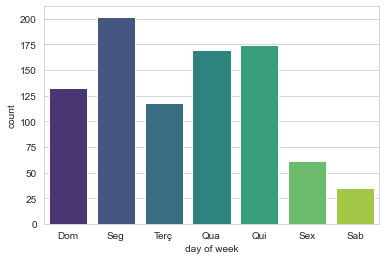

In [16]:
days_order = 'Dom Seg Ter Qua Qui Sex Sab'.split()
sns.countplot(x='day of week', data=df_twitter, order=days_order,palette='viridis')

* Quantidade de Tweets por hora

Text(0, 0.5, 'Total')

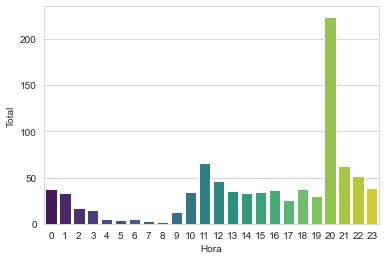

In [19]:
sns.countplot(x='hour', data=df_twitter, palette='viridis')
plt.xlabel("Hora")
plt.ylabel('Total')

* Quantidade de Tweets em relação a Dia e Hora

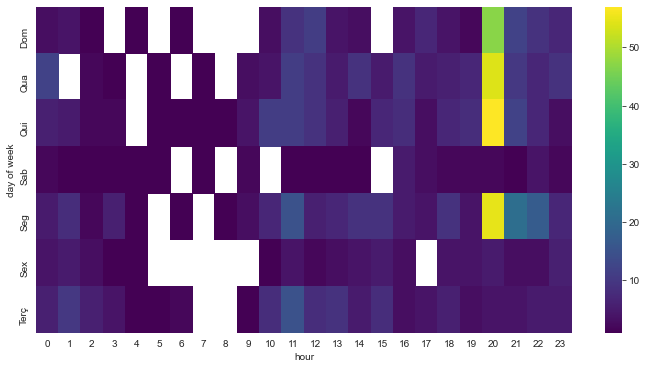

In [20]:
dayHour = df_twitter.groupby(by=['day of week', 'hour']).count()['arroba'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

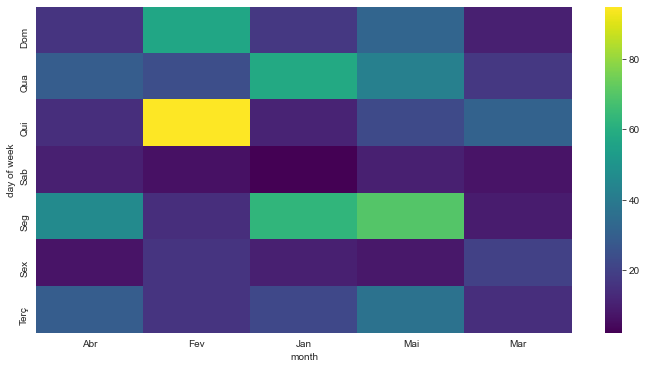

In [21]:
dayMonth = df_twitter.groupby(by=['day of week','month']).count()['arroba'].unstack()
#dayMonth.head()
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

# Experimento

Objetivos:

    * Extrapolar análise de dados para outros papéis;
    * Plotar figuras;
    * Observar padrões;

Tarefas:

    1. Leitura dataframes
    2. Preparação dos dados
    3. Visualização dos dados
    
    
## 1. Leitura dos dataframes

In [23]:
# FINANÇAS

path_finance = './database/finance/'
path_twitter = './database/twitter/'

# B3
ff_B3 = pd.read_csv(path_finance+'B3.csv', index_col=0)
tt_B3 = pd.read_csv(path_twitter+'B3.csv', index_col=0, parse_dates=['date'])

# IRB Brasil Seguros
ff_IRB = pd.read_csv(path_finance+'IRB Brasil Seguros.csv', index_col = 0)
tt_IRB = pd.read_csv(path_twitter+'IRB_Brasil_Seguros.csv', index_col=0, parse_dates=['date'])

# Petrobras
ff_petro = pd.read_csv(path_finance+'Petrobras.csv', index_col=0)
tt_petro = pd.read_csv(path_twitter+'Petrobras.csv', index_col=0, parse_dates=['date'])

# MGLU
ff_mglu = pd.read_csv(path_finance+'Magazine Luisa SA.csv', index_col = 0)
tt_mglu = pd.read_csv(path_twitter+'Magalu.csv', index_col=0, parse_dates=['date'])

## 2. Preparação dos dados

### 2.1 Concatenação dos dataframes das finanças

In [24]:
tt_mglu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      892 non-null    datetime64[ns]
 1   arroba    892 non-null    object        
 2   text      892 non-null    object        
 3   tweet_id  892 non-null    int64         
 4   favorite  892 non-null    int64         
 5   retweet   892 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 48.8+ KB


In [41]:
#Concatenando dataframes

tickers = 'B3 IRB MGLU3 PETR4'.split()

#concatenacao
df_financas = pd.concat([ff_B3, ff_IRB, ff_mglu, ff_petro], axis=1, keys=tickers)
df_financas.columns.names = ['Ticker', 'Info']

In [42]:
df_financas.head()

Ticker             B3                                                        \
Info             Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2019-01-02  26.850000  27.910000  26.680000  27.790001  25.767733  24615000   
2019-01-03  27.410000  29.120001  27.400000  29.000000  26.889681  16070400   
2019-01-04  28.680000  29.260000  27.840000  27.950001  25.916090  21778200   
2019-01-07  28.150000  28.150000  27.309999  27.799999  25.777006  11521000   
2019-01-08  27.959999  28.200001  27.549999  27.879999  25.851181  11364100   

Ticker            IRB                                   ...     MGLU3  \
Info             Open       High        Low      Close  ...       Low   
Date                                                    ...             
2019-01-02  25.702703  26.180162  25.450113  25.659578  ...  5.594687   
2019-01-03  25.628775  25.721186  25.182119  25.357700  ...  5.605000   
2019-01-04  25.644176  25.644176  24.732384  25.074306  ...  5.573437   
2019-01-07  25.182119  25.366941  24.673857  25.326897  ...  5.539687   
2019-01-08  25.351540  25.770472  25.302254  25.567167  ...  5.593750   

Ticker                                        PETR4                        \
Info           Close Adj Close    Volume       Open       High        Low   
Date                                                                        
2019-01-02  5.812187  5.645670  27017600  22.549999  24.200001  22.280001   
2019-01-03  5.750000  5.585264  26342400  23.959999  24.820000  23.799999   
2019-01-04  5.575000  5.415277  27721600  24.850000  24.940001  24.469999   
2019-01-07  5.661562  5.499360  21174400  24.850000  25.920000  24.700001   
2019-01-08  5.615937  5.455042  19398400  25.400000  25.420000  24.770000   

Ticker                                       
Info            Close  Adj Close     Volume  
Date                                         
2019-01-02  24.059999  23.284782  104534800  
2019-01-03  24.650000  23.855774   95206400  
2019-01-04  24.719999  23.923517   72119800  
2019-01-07  25.110001  24.300953  121711900  
2019-01-08  24.959999  24.155783   68761800  

[5 rows x 24 columns]

### 2.2 Gerando colunas twitter

In [256]:
months_dict = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr', 5: 'Mai'}
days_of_week = {0: 'Dom', 1: 'Seg', 2: 'Ter', 3: 'Qua', 4: 'Qui', 5: 'Sex', 6: 'Sab'}

tt_B3['date'] = pd.to_datetime(tt_B3['date'])
tt_B3['data'] = tt_B3['date'].apply(lambda x: x.date())
tt_B3['month'] = tt_B3['date'].apply(lambda x: x.month).map(months_dict)
tt_B3['day of week'] = tt_B3['date'].apply(lambda x: x.weekday()).map(days_of_week)
tt_B3['hour'] = tt_B3['date'].apply(lambda x: x.hour)
tt_B3['ticker'] = 'B3SA3'
tt_B3

tt_IRB['date'] = pd.to_datetime(tt_IRB['date'])
tt_IRB['data'] = tt_IRB['date'].apply(lambda x: x.date())
tt_IRB['month'] = tt_IRB['date'].apply(lambda x: x.month).map(months_dict)
tt_IRB['day of week'] = tt_IRB['date'].apply(lambda x: x.weekday()).map(days_of_week)
tt_IRB['hour'] = tt_IRB['date'].apply(lambda x: x.hour)
tt_IRB['ticker'] = 'IRB'

tt_petro['date'] = pd.to_datetime(tt_petro['date'])
tt_petro['data'] = tt_petro['date'].apply(lambda x: x.date())
tt_petro['month'] = tt_petro['date'].apply(lambda x: x.month).map(months_dict)
tt_petro['day of week'] = tt_petro['date'].apply(lambda x: x.weekday()).map(days_of_week)
tt_petro['hour'] = tt_petro['date'].apply(lambda x: x.hour)
tt_petro['ticker'] = 'PETR4'

df_twitter['data'] = df_twitter['date'].apply(lambda x: x.date())
df_twitter['ticker'] = 'MGLU3'

In [257]:
tickers = 'B3 IRB MGLU3 PETR4'.split()

#all_tweets = pd.concat([tt_B3, tt_IRB, df_twitter, tt_petro])
all_tweets = pd.concat([tt_B3, tt_IRB, df_twitter, tt_petro], axis=1, keys=tickers)
all_tweets.columns.names = ['Ticker', 'Info']

In [276]:
#all_tweets.xs('Index', level='Ticker', axis=1).groupby('data')['data']
all_tweets.iloc[:, all_tweets.columns.get_level_values(1)=='data']

Ticker,B3,IRB,MGLU3,PETR4
Info,data,data,data,data
0,2019-05-17,2019-05-27,2019-05-28,2019-05-30
1,2019-05-08,2019-05-24,2019-05-29,2019-05-30
2,2019-05-18,2019-05-27,2019-05-30,2019-05-30
3,2019-05-21,2019-05-22,2019-05-28,2019-05-30
4,2019-05-30,2019-05-24,2019-05-28,2019-05-30
...,...,...,...,...
11201,NaN,NaN,NaN,2019-01-01
11202,NaN,NaN,NaN,2019-01-01
11203,NaN,NaN,NaN,2019-01-02


### 3. Gráficos FINANÇAS

In [27]:
returns = pd.DataFrame()

In [28]:
for tick in tickers:
    returns[tick+' Return'] = df_financas[tick]['Close'].pct_change()

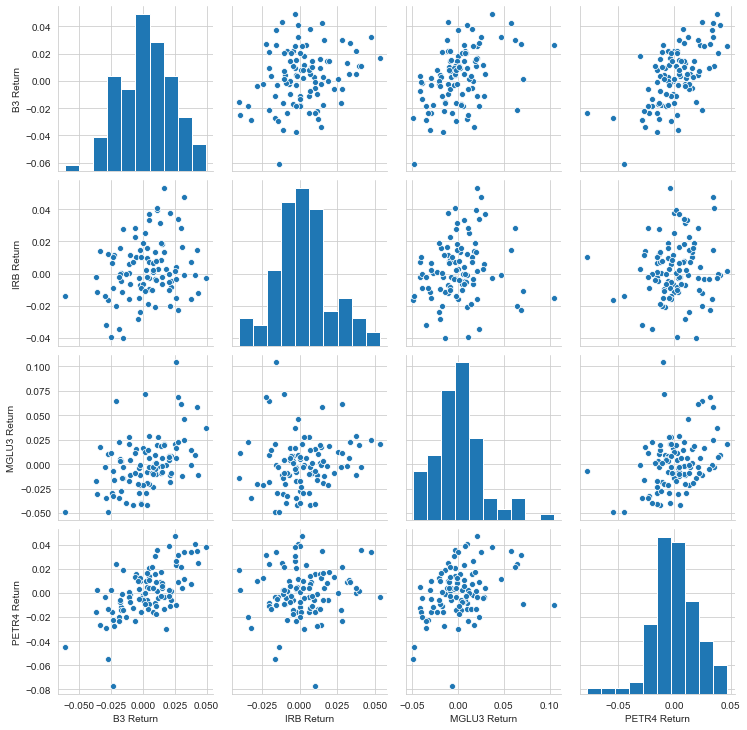

In [29]:
sns.pairplot(returns[1:])

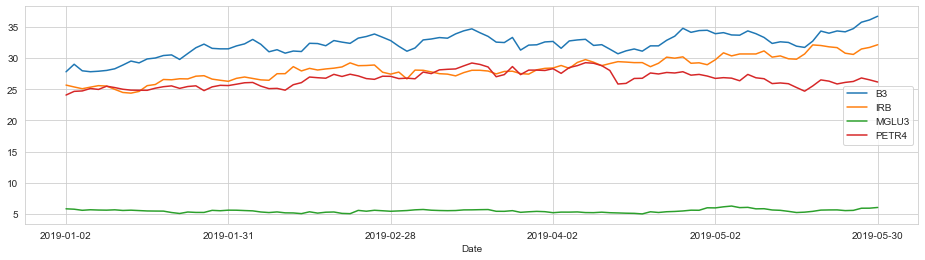

In [30]:
for tick in tickers:
    df_financas[tick]['Close'].plot(figsize=(16,4),label=tick)
plt.legend()

<Figure size 1440x720 with 0 Axes>

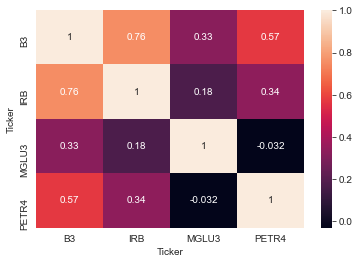

<Figure size 1440x720 with 0 Axes>

In [34]:
sns.heatmap(df_financas.xs(key='Close',axis=1,level='Info').corr(),annot=True)
plt.figure(figsize=(20,10))

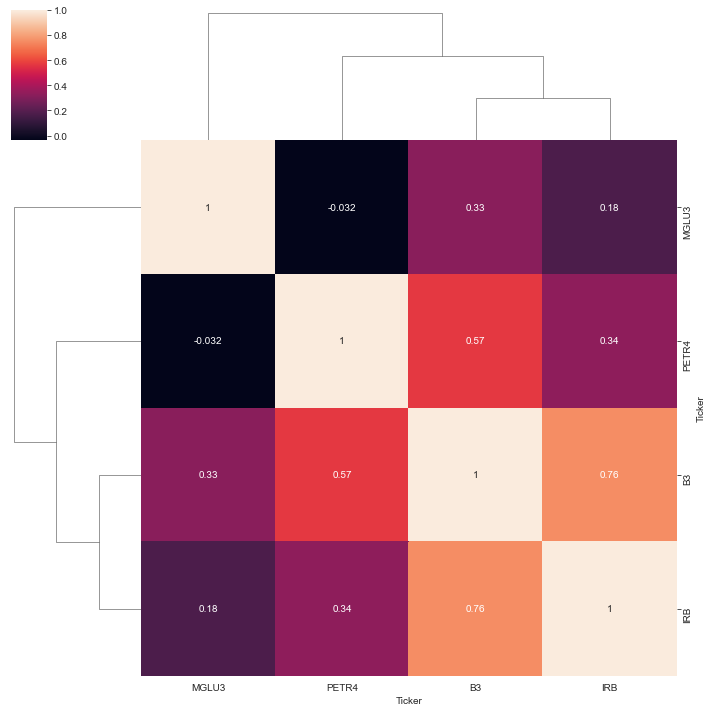

In [32]:
sns.clustermap(df_financas.xs(key='Close',axis=1,level='Info').corr(),annot=True)

### 3. GRAFICOS TWITTER

<Figure size 864x432 with 0 Axes>

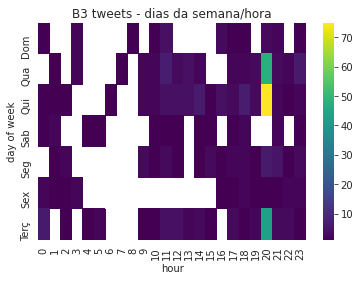

<Figure size 864x432 with 0 Axes>

In [90]:
plt.title('B3 tweets - dias da semana/hora')

dayHour = tt_B3.groupby(by=['day of week', 'hour']).count()['arroba'].unstack()
sns.heatmap(dayHour,cmap='viridis')
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

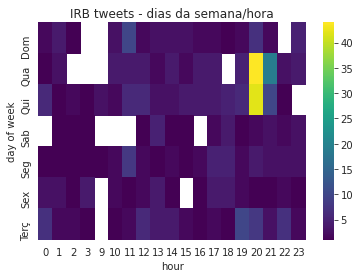

<Figure size 864x432 with 0 Axes>

In [91]:
plt.title('IRB tweets - dias da semana/hora')

dayHour = tt_IRB.groupby(by=['day of week', 'hour']).count()['arroba'].unstack()
sns.heatmap(dayHour,cmap='viridis')
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

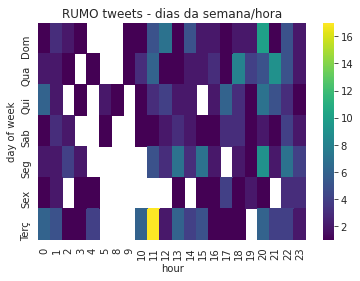

<Figure size 864x432 with 0 Axes>

In [92]:
plt.title('RUMO tweets - dias da semana/hora')

dayHour = tt_rumo.groupby(by=['day of week', 'hour']).count()['arroba'].unstack()
sns.heatmap(dayHour,cmap='viridis')
plt.figure(figsize=(12,6))

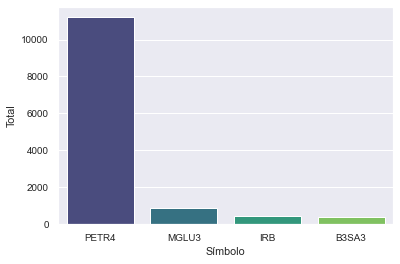

In [156]:
tickers_order = 'PETR4 MGLU3 IRB B3SA3'.split()
sns.countplot(x='ticker', data=all_tweets, order=tickers_order, palette='viridis', )
plt.xlabel('Símbolo')
plt.ylabel('Total')
plt.savefig('total_tweets.png')
sns.set(font_scale=0.9)

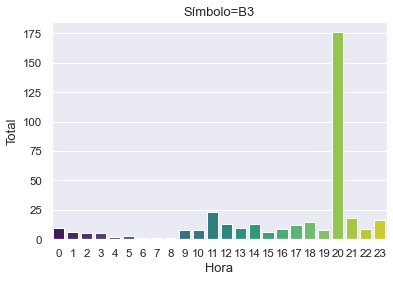

In [159]:
plt.title('Símbolo=B3', size=13)
sns.countplot(x='hour', data=tt_B3, palette='viridis')
plt.xlabel('Hora', size=13)
plt.ylabel('Total', size=13)
plt.savefig('b3_tweetsHora.png')
sns.set(font_scale=1.05)

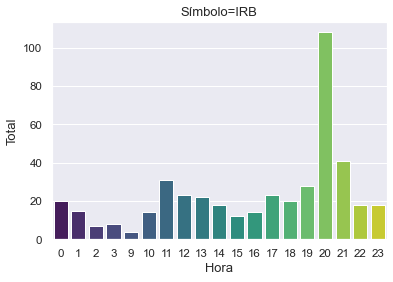

In [160]:
plt.title('Símbolo=IRB', size=13)
sns.countplot(x='hour', data=tt_IRB, palette='viridis')
plt.xlabel('Hora', size=13)
plt.ylabel('Total', size=13)
plt.savefig('irb_tweetsHora.png')
sns.set(font_scale=1.05)

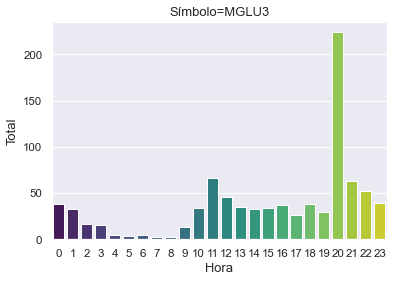

In [161]:
plt.title('Símbolo=MGLU3', size=13)
sns.countplot(x='hour', data=df_twitter, palette='viridis')
plt.xlabel('Hora', size=13)
plt.ylabel('Total', size=13)
plt.savefig('mglu3_tweetsHora.png')
sns.set(font_scale=1.05)

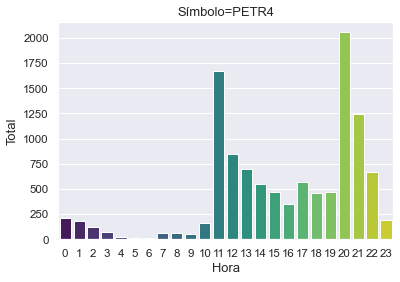

In [162]:
plt.title('Símbolo=PETR4', size=13)
sns.countplot(x='hour', data=tt_petro, palette='viridis')
plt.xlabel('Hora', size=13)
plt.ylabel('Total', size=13)
plt.savefig('petr4_tweetsHora.png')
sns.set(font_scale=1.05)

In [98]:
all_tweets.columns

Index(['date', 'arroba', 'text', 'tweet_id', 'favorite', 'retweet', 'month',
       'day of week', 'hour', 'ticker'],
      dtype='object')

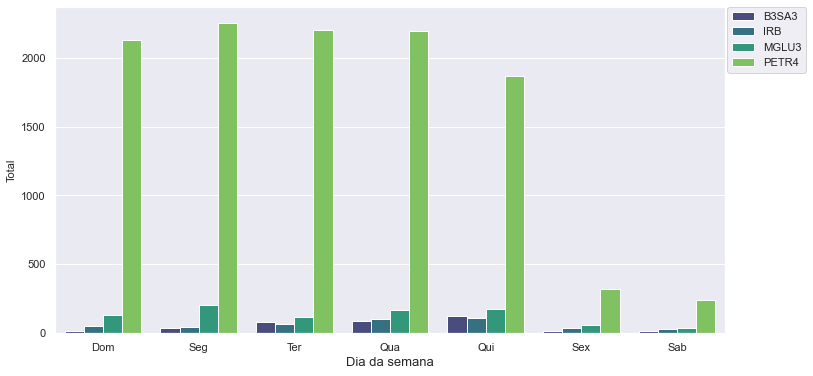

In [190]:
plt.figure(figsize=(12,6))
days_order='Dom Seg Ter Qua Qui Sex Sab'.split()
sns.countplot(x='day of week', data=all_tweets, hue='ticker', palette='viridis', order=days_order)
plt.xlabel('Dia da semana', size=13)
plt.ylabel('Total', size=11)
plt.legend(bbox_to_anchor=(1.121, 1), loc=1, borderaxespad=0.)
sns.set(font_scale=1.01)
plt.savefig('tweets_por_semana.png')

In [211]:
all_tweets['datas'] = all_tweets['date'].apply(lambda x: x.date())

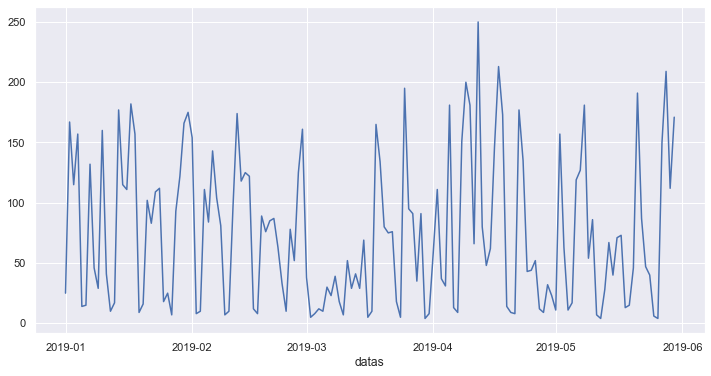

In [237]:
plt.figure(figsize=(12,6))
all_tweets[all_tweets['ticker'] == 'PETR4'].groupby('datas')['datas'].count().plot()

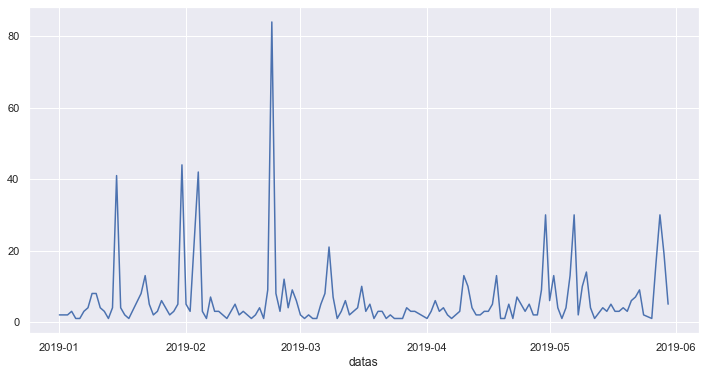

In [240]:
plt.figure(figsize=(12,6))
all_tweets[all_tweets['ticker'] == 'MGLU3'].groupby('datas')['datas'].count().plot()

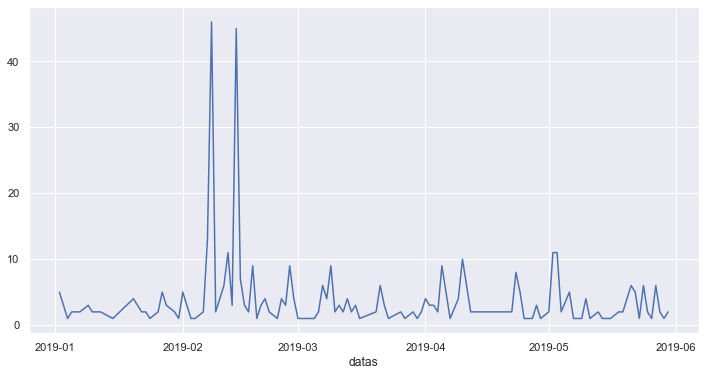

In [241]:
plt.figure(figsize=(12,6))
all_tweets[all_tweets['ticker'] == 'IRB'].groupby('datas')['datas'].count().plot()